# References:
  - **Paper Name:** A_Pedestrian_is_Worth_One_Prompt_Towards_Language_Guidance_Person_Re-_Identification
  - **Authors:** Zexian Yang1,2 Dayan Wu1* Chenming Wu3 Zheng Lin1
Jingzi Gu1 Weiping Wang1,2
  - **Paper Link:** https://openaccess.thecvf.com/content/CVPR2024/papers/Yang_A_Pedestrian_is_Worth_One_Prompt_Towards_Language_Guidance_Person_CVPR_2024_paper.pdf


----
----

## **Introduction of PromptSG Paper** 

The **Introduction** presents the motivation, challenges, and key contributions of the **Prompt-driven Semantic Guidance (PromptSG)** framework for **Person Re-Identification (ReID)**. Lets break it down into key points:

---

### **1. What is Person Re-Identification (ReID)?**
- **ReID** is the task of identifying individuals **across different cameras or time instances**.
- Challenges in ReID:
  - **Variations in lighting, background, and posture.**
  - **Difficulty in learning identity-invariant discriminative features.**
  - **Misalignment issues where existing models fail to focus on the correct parts of a person.**

---

### **2. Limitations of Existing Methods**
- **CNN- and ViT-based models** extract **discriminative features** but lack explicit **semantic guidance**.
- **Current ReID approaches use identity classification and metric learning**, but their attention mechanisms:
  - **Only highlight local features (not full-body semantics).**
  - **Require additional annotations (e.g., skeletons, masks), which are time-consuming.**
  
 **Problem:** These models fail to leverage multi-modal information effectively.

---

### **3. CLIP for Multi-Modal Learning & Its Limitations**
- **CLIP (Contrastive Language-Image Pretraining)** is **powerful** for vision-language alignment.
- **CLIP-ReID** (prior work) tried to use **automated prompts** for ReID by:
  - Training **ID-wise learnable vectors** to create textual descriptions.
  - Using a **two-stage training process** where text is used to guide the image encoder.
  
 **Limitations of CLIP-ReID:**
1. The model **only uses visual features** for inference, making learned text prompts **ineffective for unseen IDs**.
2. The prompts **fail to fully describe a pedestrian's visual context**.
3. The attention regions **often capture background elements (cars, people, etc.)** instead of the actual body.

 **Key Insight:** CLIPs text prompt `"A photo of a person"` lacks **identity-specific information**!

---

### **4. Introducing Prompt-driven Semantic Guidance (PromptSG) **
- **Core Idea:** Instead of using predefined static prompts, **PromptSG dynamically generates textual prompts** by:
  - **Refining CLIP's cross-modal attention maps** to ensure the model attends to **semantically meaningful regions**.
  - **Learning a "pseudo-token" representation** of an individuals appearance.
  - **Incorporating this token into the text prompt** to generate a **personalized description**.

 **How does it work?**
 Learns **fine-grained attributes** (beyond "a person").  
 Uses **textual inversion** to create **identity-specific descriptions**.  
 **No extra labels** like masks or bounding boxes are needed.

---

### **5. Advantages of PromptSG over CLIP-ReID**
- **1 The model learns cross-attention maps** guided by language, **highlighting precise body parts**.
- **2 Identity-specific pseudo-tokens** help differentiate individuals, even in unseen cases.
- **3 Works in an end-to-end manner**, meaning it **learns everything in one training process**.
- **4 No need for extra annotations** like masks or bounding boxes.

 **Results:**
- **+10% mAP improvement on MSMT17.**
- **+5% mAP improvement on Market-1501.**
- **Surpasses previous SOTA methods in person ReID.**

---

### **6. Contributions of This Paper**
 **Novel ReID framework PromptSG** that **integrates language prompts** into vision models.  
 **Learns personalized appearance descriptions** via **textual inversion**.  
 **Achieves SOTA results** without **extra labeling efforts** (bounding boxes, masks, etc.).

---


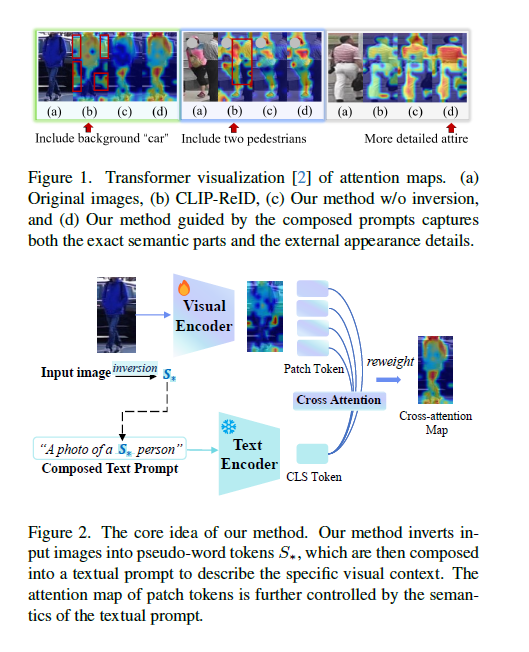

## **Related Work Section of PromptSG Paper** 

The **Related Work** section provides an overview of previous research relevant to **Person Re-Identification (ReID)** and **Vision-Language (VL) Models**. It discusses the limitations of existing approaches and highlights how PromptSG builds on and improves them. Lets go through it step by step. 

---

## **1 Person Re-Identification (ReID) Research**
 **Challenges in ReID:**  
- Subtle differences between individuals make it hard to distinguish between identities (**inter-class similarity**).
- Models struggle with misalignment and extracting **meaningful semantic parts** from images.
- Traditional CNN-based methods rely on **metric learning** to improve the distance between features of different identities.

 **Existing CNN-based Techniques:**  
- Many approaches focus on **metric learning** to create more discriminative feature representations.
- **Attention mechanisms** have been widely explored to help focus on **key body parts** for better feature extraction.
- **Example Models:**
  - **AAnet**   Uses **attribute attention maps** to enhance semantic understanding but requires additional attribute labels.
  - **TransReID**   Uses **Vision Transformer (ViT)** to improve person ReID through **self-attention mechanisms**.
  - **DCAL**   Uses a **global-local cross-attention mechanism** to extract local features from global context.

 **Limitation:**  
These methods **only apply attention within the visual domain**, without **explicit language guidance**, which could further refine the feature extraction.

---

## **2 Vision-Language Models & CLIP for ReID**
 **What are Vision-Language Models?**  
- VL models **map images and text into a shared embedding space**, making them effective across many tasks like:
  - Image **classification**
  - **Image captioning**
  - **Cross-modal retrieval** (finding images from text descriptions)

- **CLIP (Contrastive Language-Image Pretraining)** is one of the most powerful VL models that learns **from large-scale image-text pairs**.

 **How has CLIP been used in ReID?**
- **CLIP-ReID** was **the first** to apply CLIP to ReID by:
  1. Using **automated prompts** for different person IDs.
  2. Creating **ID-specific learnable vectors** to classify individuals.
  3. Training a **two-stage process** where textual prompts help train the image encoder.

 **Limitation of CLIP-ReID:**
 The **text encoder is not used during inference**, making it **useless for unseen identities**.  
 The **prompts are fixed and cannot adjust** to new individuals dynamically.  
 The **attention regions do not always focus** on the correct body parts and often include background elements.

 **PromptSG Improves This!**  
 Instead of just aligning text and vision, **PromptSG explicitly uses language** to **control attention** in different image regions.  
 **Textual inversion** allows it to learn **personalized descriptions** for individuals.  

---

## **3 Textual Inversion for Image-to-Text Mapping**
 **What is Textual Inversion?**
- Originally used for **text-to-image generation**, textual inversion **learns pseudo-words** that can capture:
  - **Overall visual content** (e.g., a person in a red jacket).
  - **Fine-grained details** (e.g., a person wearing a black cap with white shoes).

 **How has it been used before?**
- **Zero-shot composed image retrieval**  Learning representations from unlabeled datasets.
- Typically **pre-trained using massive datasets**, but **PromptSG is the first to apply it to ReID**.

 **Key Innovation in PromptSG:**  
 Uses textual inversion to **generate personalized prompts for each individual**.  
 Eliminates the need for **manual labels or predefined soft prompts**.  
 **First method** to apply textual inversion to **ReID without extra training data**.  

---

## ** Key Takeaways**
 **CNN & ViT-based ReID** models mainly use **visual attention**, ignoring **language-based improvements**.  
 **CLIP-ReID introduced vision-language alignment**, but its approach **fails for unseen identities**.  
 **PromptSG bridges this gap** by:
- Using **language-driven attention** to **highlight body parts more accurately**.  
- Applying **textual inversion** to learn **personalized representations** for individuals.  
- Ensuring that **text prompts help the model even during inference**.  

---


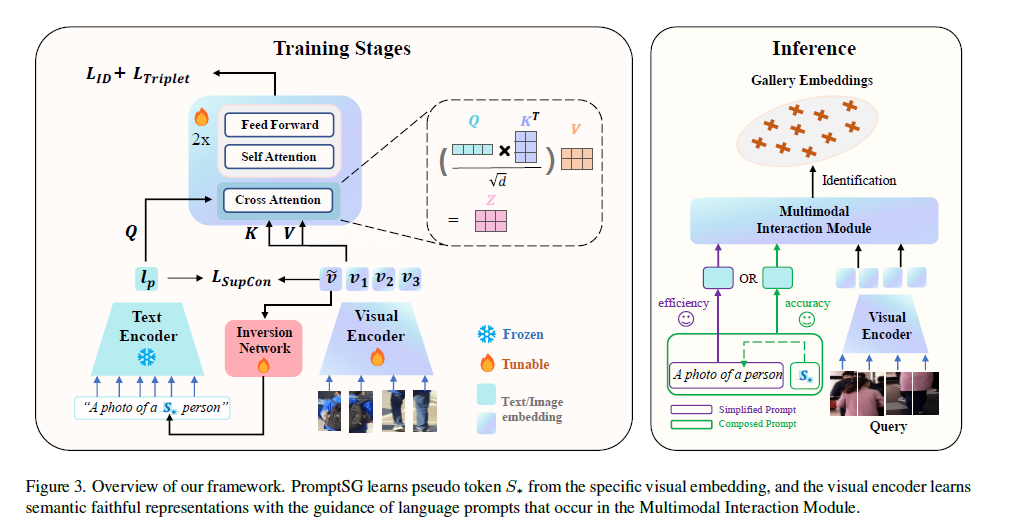

## **Preliminary Concepts of PromptSG**   

This section explains the foundation of **Contrastive Language-Image Pre-training (CLIP)** and how it applies to **Person Re-Identification (ReID)**. It highlights the limitations of previous methods like **CLIP-ReID** and sets the stage for the **Prompt-driven Semantic Guidance (PromptSG) framework**.

---



### ** What is CLIP?**
CLIP (**Contrastive Language-Image Pre-training**) is a **vision-language model** trained on a **large dataset of image-text pairs**. It learns **aligned representations** of images and text in a **shared feature space**, meaning that **related images and their descriptions have similar embeddings**.

  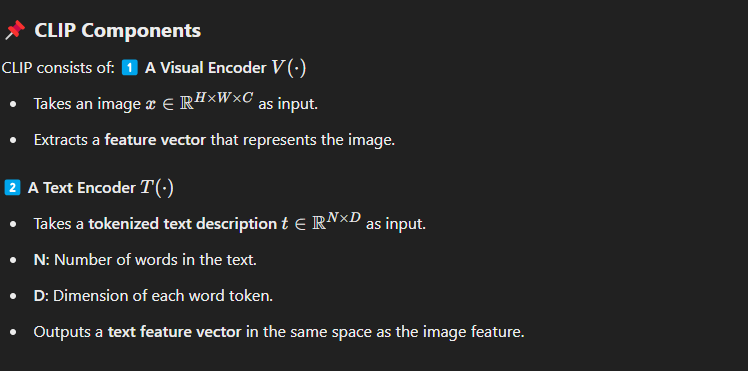


### ** How CLIP Works in Pre-training**
CLIP **matches image and text embeddings** so that similar pairs are **close together** and dissimilar pairs are **far apart**. This is done using **contrastive learning**.

  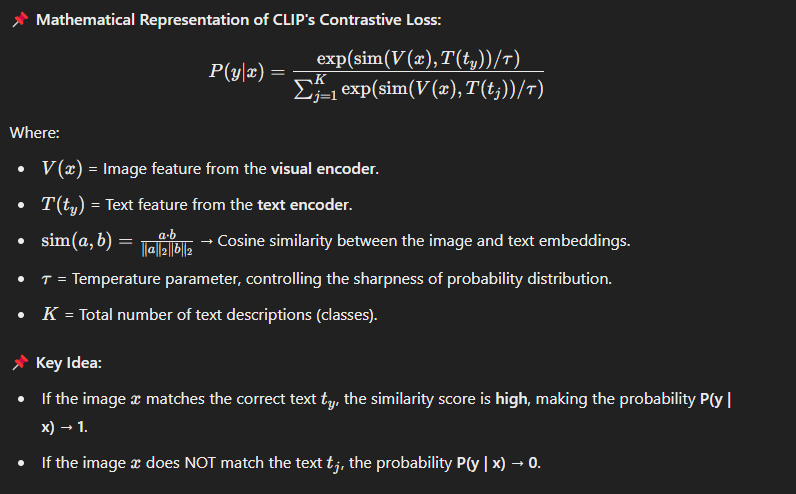


### ** How is CLIP Applied to Person ReID?**
Since CLIP is trained for **image-text retrieval and classification**, it **does not directly work for ReID**, where labels are just **index numbers (e.g., ID_001, ID_002)** instead of meaningful words like "cat" or "dog."

  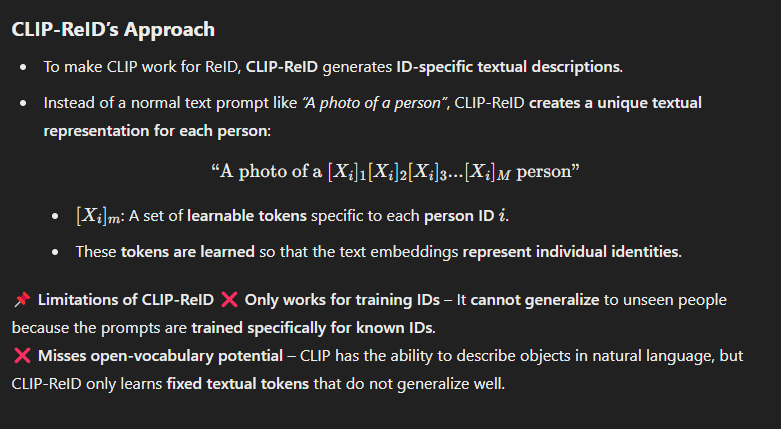


### ** How Does PromptSG Improve on CLIP-ReID?**
 **Uses open-vocabulary learning**  Instead of **fixed ID tokens**, PromptSG **learns pseudo-tokens** that **encode appearance details**.  
 **Guides attention using language**  It **aligns image features with meaningful text prompts**, **helping focus on discriminative body parts**.  
 **Works for unseen classes**  Unlike CLIP-ReID, PromptSG **generalizes to new identities** without needing ID-specific training.

---

#### ** Summary**
 **CLIP learns image-text alignment**, making it powerful for **zero-shot classification**.  
 **CLIP-ReID adapts CLIP for Person ReID**, but **only works for known identities**.  
 **PromptSG overcomes this limitation** by using **learnable pseudo-tokens** to provide **semantic guidance** for identity recognition.  


## **Understanding the Methodology of PromptSG**   
*(Breaking down Section 4 with explanations and insights.)*  

---



### ** Overview of PromptSG Framework (Figure 3)**
The **Prompt-driven Semantic Guidance (PromptSG)** framework refines **CLIP** for **Person Re-Identification (ReID)**. It follows a **three-step approach**:

1 **Learning Personalized ID-Specific Prompts**  Uses an **Inversion Network** to generate **pseudo-tokens** representing an individuals visual appearance.  
2 **Prompt-driven Semantic Guidance**  Integrates **language guidance** to **direct attention** to relevant image regions.  
3 **Optimization & Inference**  Trains the model with **ReID-specific loss functions**, while also offering a **fast inference strategy**.

 **Key difference from CLIP-ReID**  Instead of **static text prompts**, PromptSG **learns dynamic pseudo-tokens** that **better represent identity features**.

---



### ** 4.1. Learning Personalized ID-Specific Prompts**  



#### ** Problem with CLIP-ReID**  
- In **CLIP-ReID**, textual prompts are **fixed** and only work for **training identities**.  
- The predefined prompts **lack personalization**, failing to capture individual identity traits.  



#### ** Solution: Learn Pseudo-Tokens using Textual Inversion**  

  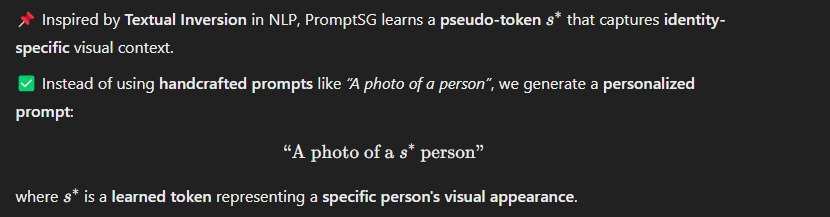

#### ** How is \(s^*\) Learned?**  

  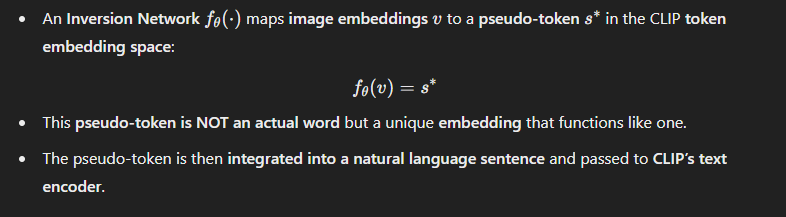

#### ** Ensuring Pseudo-Token Quality**

  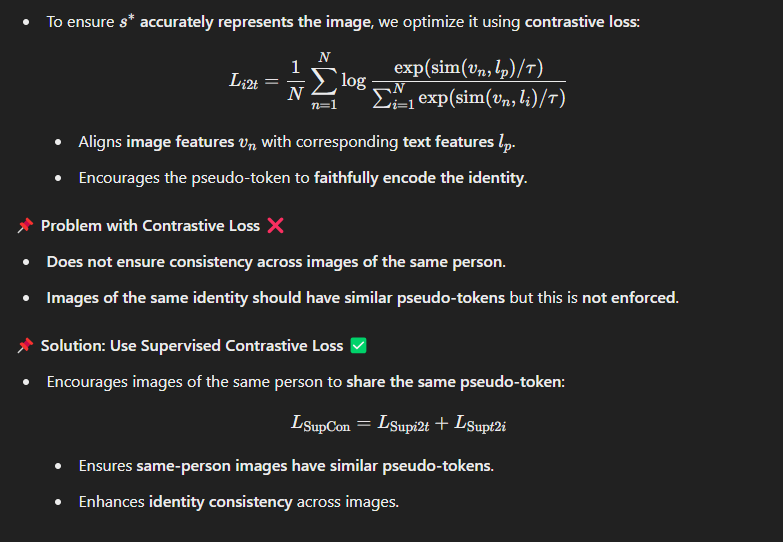

### ** 4.2. Prompt-driven Semantic Guidance**  



  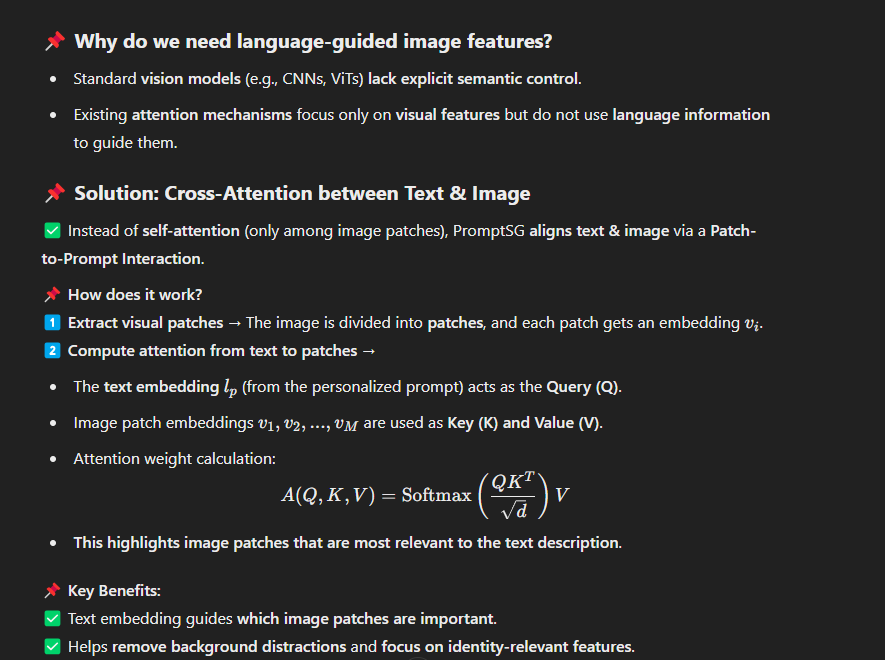

### ** 4.3. Optimization & Inference**  

  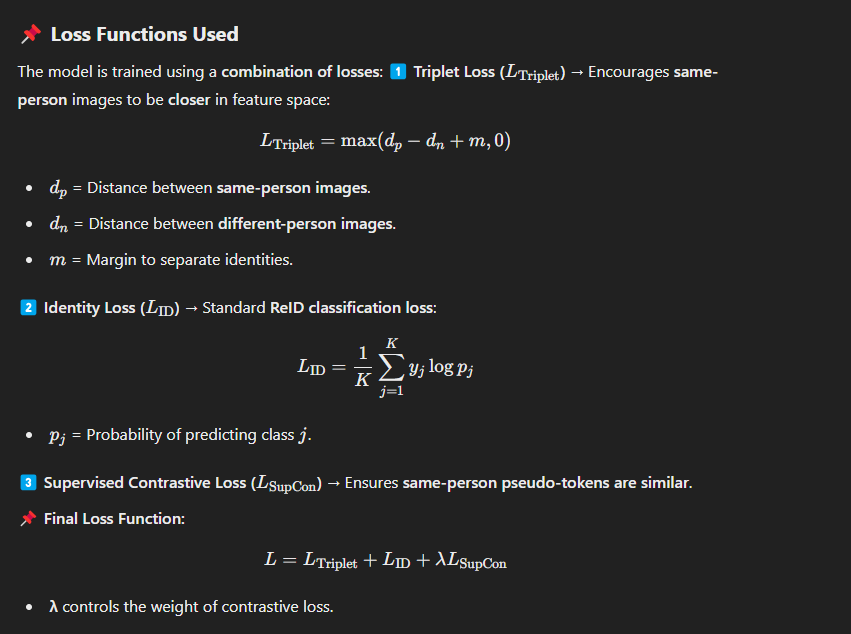

#### ** Efficient Inference Strategy**
 **Problem:** Using a **query-specific pseudo-token** doubles inference time since both **text & image encoders** are needed.  
 **Solution:** Use a **simplified prompt**  _A photo of a person_  
 Reduces inference time while maintaining **similar accuracy**.

---



### ** Summary of PromptSGs Innovations**
 **Learns personalized pseudo-tokens** instead of relying on predefined prompts.  
 **Uses cross-attention to guide image feature extraction** using language.  
 **Combines contrastive, triplet, and identity losses** to improve identity consistency.  
 **Supports fast inference** using a simplified prompt.  

---


## ** Section 5: Experiments  Understanding the Setup and Implementation**  

This section details how **PromptSG** is evaluated, including **datasets, evaluation metrics, implementation details, and baseline comparisons**. Lets break it down step by step.

---



### ** 5.1. Experimental Setting**  



#### ** Datasets and Evaluation Protocols**  
To ensure a fair comparison, the study evaluates **PromptSG** on four major **Person Re-ID datasets**:

| **Dataset** | **# IDs** | **# Images** | **# Cameras** |
|------------|---------|----------|----------|
| **Market-1501** | 1,501 | 32,668 | 6 |
| **MSMT17** | 4,101 | 126,441 | 15 |
| **DukeMTMC-reID** | 1,404 | 36,411 | 8 |
| **CUHK03-NP** | 1,467 | 13,164 | 2 |



#### ** How is performance measured?**
Two standard **ReID evaluation metrics** are used:


##### **1 Mean Average Precision (mAP)  Measures Overall Search Accuracy**
Think of mAP like **a score that tells how well the model retrieves the right person across multiple search attempts**.  

 Imagine you are looking for a person in a **large crowd of images** (like security camera footage).  
 The model gives you **a ranked list** of possible matches for that person.  
 **If the correct person appears near the top of the list**, the mAP score is higher.  
 If the correct person appears **far down the list or not at all**, the mAP score is lower.

💡 **Higher mAP = Better overall search accuracy.**  
💡 **Lower mAP = The model is struggling to find the right person.**

---

##### **2️⃣ Rank-1 (R-1) Accuracy – Measures First Choice Success**
Think of Rank-1 accuracy as **how often the model picks the correct person as its first choice**.  

🔹 If the **top result** the model suggests is the correct person, that counts as a **success**.  
🔹 If the correct person is **not the first result**, it’s a **failure for Rank-1 accuracy**, even if they appear lower in the list.  

💡 **Higher Rank-1 Accuracy = The model is making good first guesses.**  
💡 **Lower Rank-1 Accuracy = The model’s first guess is often wrong.**

---

##### **✅ What Do These Scores Mean?**
- **A high mAP and high Rank-1 Accuracy** means the model is **very reliable** at finding people.  
- **A high Rank-1 but low mAP** means the model gets the first guess right sometimes, but struggles to rank other matches correctly.  
- **A low Rank-1 and low mAP** means the model is **not performing well** and needs improvement.  

---

##### **💡 Example for Better Understanding**
Imagine a **security system** at a shopping mall trying to find a **lost child** from security camera footage.

- **mAP**: How well does the system find **all images of that child**, even if they appear in different camera angles or lighting?  
- **Rank-1 Accuracy**: If the system shows **only one image as the answer**, is it the **correct child**?  

If **mAP and Rank-1 are high**, the system works **great** and can **accurately find the child quickly**.  
If **they are low**, the system might **struggle to find the child or return the wrong person**.  

---



### **🔹 Implementation Details**  



#### **📌 What models are used?**  

✅ **Visual Encoder:** **ResNet-50** and **ViT-B/16** (both pre-trained on CLIP).  
✅ **Text Encoder:** **CLIP's text Transformer** (pre-trained).  
✅ **Inversion Network:** A randomly initialized **lightweight 3-layer MLP (512-dim hidden state)**.  
✅ **Multimodal Interaction Module:** Handles **cross-attention between text and images**.



#### **📌 Training Details**  
- **Batch Size:** 64  
  - 16 **identities per batch**, each with **4 images**.  
- **Image Input Size:** **256 × 128**  
- **Optimizer:** **Adam**  
- **Learning Rate:**  
  - **5e-6** for the **visual encoder**.  
  - **5e-5** for the **randomly initialized modules** (Inversion network & Interaction module).  
- **Decay Strategy:** **Reduce learning rate by 0.1 every 20 epochs**.  
- **Number of Training Epochs:** **60 epochs**  
- **Hyperparameter \(λ\):** **0.5 across all datasets**  
  - (This controls the balance between **supervised contrastive loss** and other losses).  
- **Hardware:**  
  - **NVIDIA RTX 3090 GPU (24GB VRAM)**  
  - **PyTorch framework used for implementation**  

✅ **Why these settings?**  
- The chosen **learning rate** and **batch size** ensure a **stable training process**.  
- Using **CLIP's pretrained weights** **reduces training time** and helps in **better generalization**.  
- **Adam optimizer** is chosen for its ability to **handle sparse gradients well**.  

---



### **🔹 Baseline Comparison**  

📌 **How does the baseline differ from PromptSG?**  

1️⃣ **Existing methods**:  
   - Use **ImageNet-21k pre-trained CNN (ResNet-50) or ViT** as the **backbone**.  
   - Optimize using **ID loss and Triplet loss**.  
   
2️⃣ **PromptSG baseline**:  
   - Uses **CLIP pre-trained visual encoder**.  
   - Fine-tunes the CLIP image encoder with **ID loss and Triplet loss**.  
   - Integrates **pseudo-tokens** for personalized textual prompts.  

✅ **Key Difference:** Instead of using a traditional CNN/Vision Transformer, **PromptSG benefits from CLIP’s cross-modal pretraining**, which helps in **better semantic understanding**.  

---



### **💡 Key Takeaways from Section 5.1**  
- **Datasets**: Market-1501, MSMT17, DukeMTMC, CUHK03-NP  
- **Evaluation Metrics**: mAP & Rank-1 accuracy  
- **Implementation Details**:
  - **Pretrained CLIP-based visual and text encoders**  
  - **Inversion network for pseudo-tokens**  
  - **Batch size of 64**, **learning rate decay every 20 epochs**  
- **Hardware**: **NVIDIA RTX 3090 with PyTorch**  
- **Baseline**: CLIP-based ReID model vs. **ImageNet-pretrained CNN/Vision Transformer** models  

---


## **📌 Performance of PromptSG in ReID**
  
This section evaluates **PromptSG** against **state-of-the-art ReID models** across **four major datasets**:  
✔ **Market-1501**  
✔ **MSMT17**  
✔ **DukeMTMC**  
✔ **CUHK03-NP**  

It compares **three categories** of methods:  
1️⃣ **CNN-based methods** (ResNet-50)  
2️⃣ **ViT-based methods** (Vision Transformers)  
3️⃣ **CLIP-based methods** (Vision-Language models)  

---



### **📊 How Well Does PromptSG Perform?**
PromptSG **sets new records** for person ReID performance:  
✅ **+10% mAP on MSMT17** (compared to previous models)  
✅ **+5% mAP on Market-1501**  

🔹 **Why is MSMT17 improvement so important?**  
👉 MSMT17 is the **most challenging ReID dataset** due to its **large scale, high diversity, and complex backgrounds**.  
👉 A **10% improvement** means **significant progress** in making ReID more **reliable in real-world applications**.  

🔹 **Market-1501 gains are also crucial**  
👉 Market-1501 is one of the **most widely used ReID datasets**. A **5% increase** proves **real-world effectiveness**.  

---



### **🔍 1️⃣ Comparison with ViT-based Methods**
🔹 **Best ViT-based baseline:** **TransReID [ICCV’21]**  
🔹 **PHA [CVPR’23] improves upon TransReID by preserving high-frequency image details.**  
🔹 **PromptSG goes further by integrating textual information during inference,** leading to a massive **boost in performance**.

📌 **PromptSG (ViT-B/16) vs. TransReID (ViT-B/16):**  
✔ **Market-1501:** **+5.7% mAP, +1.8% Rank-1**  
✔ **MSMT17:** **+19.8% mAP, +7.3% Rank-1**  
✔ **DukeMTMC:** **+0.4% Rank-1**  
✔ **CUHK03-NP:** **+3.5% mAP, +3.4% Rank-1**  

👉 **Key Insight:**  
PromptSG proves that **cross-modal (image + text) interaction improves single-modal (image-only) transformers**.

---



### **🔍 2️⃣ Comparison with CLIP-based Methods**
🔹 **Previous CLIP-based model:** **CLIP-ReID [AAAI’23]**  
🔹 **CLIP-ReID pioneered vision-language integration for ReID** but does not use **textual prompts during inference.**  

📌 **PromptSG (ViT-B/16) vs. CLIP-ReID (ViT-B/16):**  
✔ **Market-1501:** **+5.0% mAP, +1.5% Rank-1**  
✔ **MSMT17:** **+13.8% mAP, +3.9% Rank-1**  
✔ **DukeMTMC:** **+0.9% Rank-1**  
✔ **CUHK03-NP:** **+1.5% mAP, +4.2% Rank-1**  

👉 **Why does PromptSG perform better?**  
✔ **CLIP-ReID only optimizes text prompts during training.**  
✔ **PromptSG also uses textual information at inference time, boosting accuracy.**  

---



### **🔍 3️⃣ Comparison with CNN-based Methods**
🔹 **Baseline CNN:** **ResNet-50**  
🔹 **Most advanced CNN-based ReID:** **LTReID [TMM’22]**  

📌 **PromptSG (ResNet-50) vs. LTReID (ResNet-50):**  
✔ **Market-1501:** **+4.9% mAP, +1.9% Rank-1**  
✔ **MSMT17:** **+9.9% mAP, +5.0% Rank-1**  
✔ **DukeMTMC:** **-0.1% Rank-1**  
✔ **CUHK03-NP:** **-0.8% mAP, -1.6% Rank-1**  

👉 **Key Insights:**  
✔ **PromptSG beats all CNN-based methods by a significant margin on MSMT17.**  
✔ **It performs slightly worse on DukeMTMC and CUHK03-NP but still remains competitive.**  
✔ **Shows that even traditional CNNs can benefit from language guidance.**  

---



### **🎯 Takeaways from the Results**
📌 **1️⃣ PromptSG is the new state-of-the-art in person ReID.**  
📌 **2️⃣ Using textual prompts at inference improves performance.**  
📌 **3️⃣ Cross-modal learning (image + text) beats uni-modal learning (image-only).**  
📌 **4️⃣ The advantage is especially large in challenging datasets (MSMT17, Market-1501).**  


## **🚀 Conclusion and Future Directions of PromptSG**
---

### **📌 Summary of Contributions**
PromptSG is a **novel and effective** framework that:
✅ **Leverages CLIP's multimodal knowledge** to guide **Person ReID** using **language prompts**.  
✅ Uses **textual prompts ("A photo of a person")** to **enhance semantic understanding** in CLIP's **visual encoder**.  
✅ Introduces an **inversion network** to **learn pseudo-tokens**, capturing **fine-grained visual features**.

---

### **📌 Key Insights from the Paper**
🔹 **Language guidance is effective** in adapting **multimodal models** (like CLIP) for **uni-modal retrieval tasks**.  
🔹 **Using textual prompts** naturally enhances semantic awareness in **image-based retrieval**.  
🔹 **Fine-tuning a visual encoder alone** struggles with capturing **semantic information**, but integrating **textual prompts** improves its robustness.  
🔹 **Pseudo-token learning via inversion networks** allows **better person re-identification** by capturing **unique visual context**.

---

### **🛑 Discussion & Limitations**
While **PromptSG** shows **remarkable improvements**, some challenges remain:  
❌ **Prompt learning in the vision branch is still underexplored.**  
   - The study primarily **relies on text-based prompts** to guide the model.
   - A **future direction** could be exploring **visual prompt learning** for **self-supervised vision adaptation**.  
❌ **Fine-tuning the visual encoder improves supervised performance but may hurt zero-shot generalization.**  
   - Zero-shot **ReID on unseen classes** needs further investigation.  
   - Finding a **balance between fine-tuning and generalization** is key.  

---

### **💡 Future Directions**
🚀 **1. Exploring Visual Prompt Learning**  
- Current prompt learning **relies on language**, but **vision-side prompting** (e.g., image patch embeddings) could **enhance ReID robustness**.  
- Vision-language models like **BLIP, Flamingo** could inspire **new ways to integrate visual guidance**.  

🚀 **2. Improving Zero-Shot Generalization**  
- Instead of **fine-tuning the entire visual encoder**, future work could explore:  
  - **Adapter-based tuning** (like LoRA)  
  - **Parameter-efficient prompt tuning**  
  - **Meta-learning strategies** for unseen ReID datasets.  

🚀 **3. Applying PromptSG Beyond Person ReID**  
- Could **PromptSG work for vehicles, animals, or general object retrieval?**  
- Testing on **cross-domain retrieval tasks** (e.g., **wildlife tracking, retail shoplifting detection**) could be promising.  

🚀 **4. More Efficient Training Strategies**  
- Reducing **computational overhead** while keeping **text-image alignment strong**.
- Exploring **distillation techniques** to compress large models into **lighter, faster versions**.

---

### **🔮 Final Thoughts**
PromptSG is **a breakthrough in using language-driven prompts** for **person ReID**. The combination of **language guidance + visual encoding fine-tuning** has set a **new state-of-the-art**. However, **scaling this method beyond ReID** and **improving zero-shot capabilities** remains an exciting **future challenge**! 🎯

---
